<a href="https://colab.research.google.com/github/DesiPilla/frus-event-exctraction/blob/master/FRUS_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Packages

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import string
from time import time
import seaborn as sns
import datetime as dt

!pip install langdetect
from langdetect import detect

!pip install iso-language-codes
from iso_language_codes import language_name

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download("punkt")

     |████████████████████████████████| 983kB 2.6MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=4f9d2b590593c497e7afdc7b7eecc600198d55af794f5bffd465885bb8d6c52b
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load Data

In [2]:
cd '/content/drive/My Drive/FRUS/Raw Data'

/content/drive/.shortcut-targets-by-id/119/FRUS/Raw Data


In [47]:
load_from_scratch = False
if load_from_scratch:
    all_presidents = pd.read_csv('Combined Data/AllPresidentsFormatted.csv').rename(columns={'url':'uid', 'website':'president'})
    all_presidents.date = pd.to_datetime(all_presidents.date, infer_datetime_format=True, errors='coerce')
    all_presidents.dropna(inplace=True)
    all_presidents.head()

In [111]:
if load_from_scratch:
    print("Calculating decade...")
    all_presidents['decade'] = all_presidents.date.dt.year // 10 * 10
    print("Calculating number of words in each document...")
    all_presidents['num_words'] = [len(text.split(' ')) for text in all_presidents.text]
    print("Calculating number of capitalized words in each document...")
    all_presidents['num_capitalized_words'] = [len(re.findall('((?<!^)(?<!\. )[A-Z][a-z]+)', text)) for text in all_presidents.text]
    print("Calculating percentage of capitalized words in each document...")
    all_presidents['perc_capitalized_words'] = all_presidents['num_capitalized_words'] / all_presidents['num_words']
    all_presidents.to_csv('Combined Data/all_presidents_df.csv')
    print("Done.")
else:
    all_presidents = pd.read_csv('Combined Data/all_presidents_df.csv').iloc[:, 1:]

all_presidents.head()

,text,title,uid,date,president,language,decade,num_words,num_capitalized_words,perc_capitalized_words
0,"Memorandum of Conversation, by the Officer in ...","[1] Memorandum of Conversation, by the Officer...",1,1952-02-20,Truman,English,1950,1235,189,0.153036
1,The Ambassador in the Union of South Africa ( ...,[2] The Ambassador in the Union of South Afric...,2,1952-03-14,Truman,English,1950,1155,205,0.177489
2,The Consul General at Salisbury ( Sims ) to th...,[3] The Consul General at Salisbury ( Sims ) t...,3,1952-03-18,Truman,English,1950,2535,311,0.122682
3,The Ambassador in Liberia ( Dudley ) to the De...,[4] The Ambassador in Liberia ( Dudley ) to th...,4,1952-01-03,Truman,English,1950,3790,419,0.110554
4,The Consul General at Salisbury ( Sims ) to th...,[5] The Consul General at Salisbury ( Sims ) t...,5,1952-06-16,Truman,English,1950,460,56,0.121739


In [106]:
print('This file contains {:,} documents.'.format(len(all_presidents)))

This file contains 323,294 documents.


In [6]:
by_decade = all_presidents.groupby('decade')

## Number of Documents Exploration

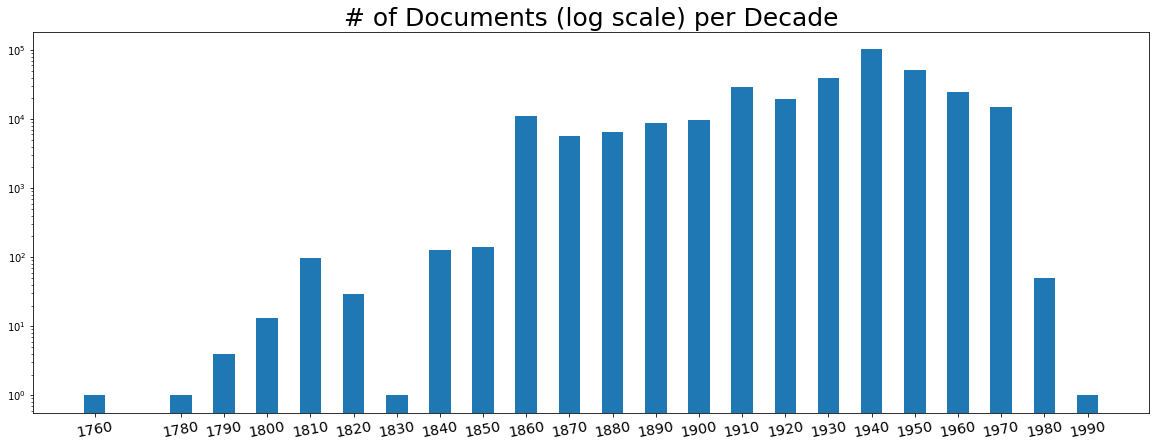

In [8]:
decades = by_decade.count().index
num_docs = by_decade.count().text

fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(decades, num_docs, width=5)
ax.set_xticks(decades)
ax.set_xticklabels(decades, rotation=10, size='x-large')
ax.set_yscale("log")
ax.set_title('# of Documents (log scale) per Decade', size=25)
# ax.set_ylabel('# of Documents (log scale)', size='xx-large')
# ax.set_xlabel('Decade', size='xx-large')
fig.show()

**Figure:** This figure shows the number of documents in the database from each decade.

## Document Lenth Exploration 

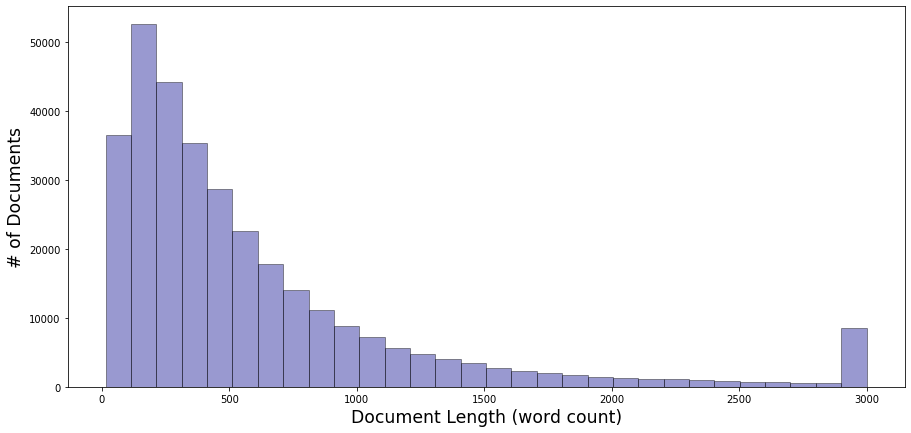

In [10]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(np.clip(all_presidents.num_words, 0, 3000), hist=True, kde=False, 
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'})
ax.set_ylabel('# of Documents', size='xx-large')
ax.set_xlabel('Document Length (word count)', size='xx-large')
fig.show;

**Figure:** This figure shows the distribution of document lengths (measured by the word count of a document). The distribution contains documents from all time periods and presidents.

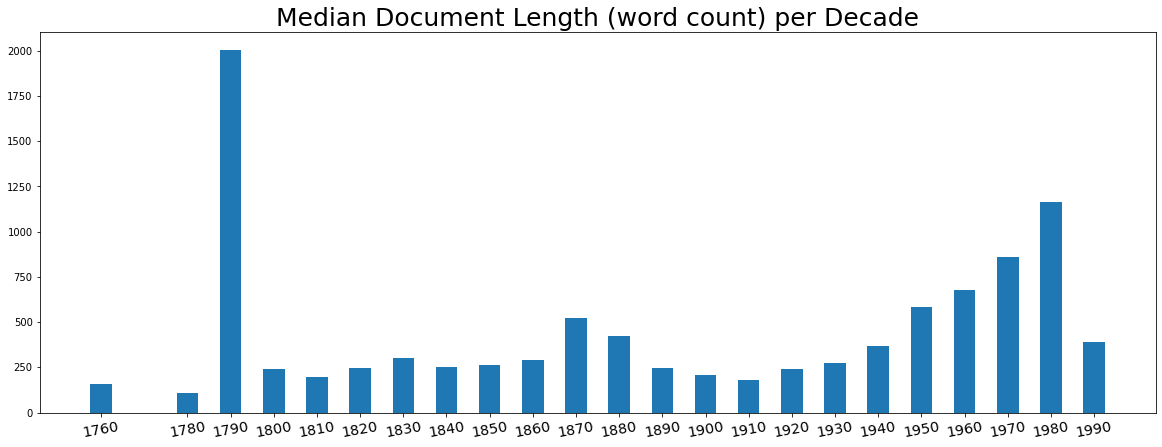

In [9]:
num_words = by_decade.median().num_words

fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(decades, num_words, width=5)
ax.set_xticks(decades)
ax.set_xticklabels(decades, rotation=10, size='x-large')
ax.set_title('Median Document Length (word count) per Decade', size=25)
# ax.set_ylabel('Median Document Length (word count)', size='x-large')
# ax.set_xlabel('Decade', size='xx-large')
fig.show()

**Figure:** This figure shows the median document length (as measured by the number of words in a document) for each decade.

## Document Contents Distribution

### Capitalized Words

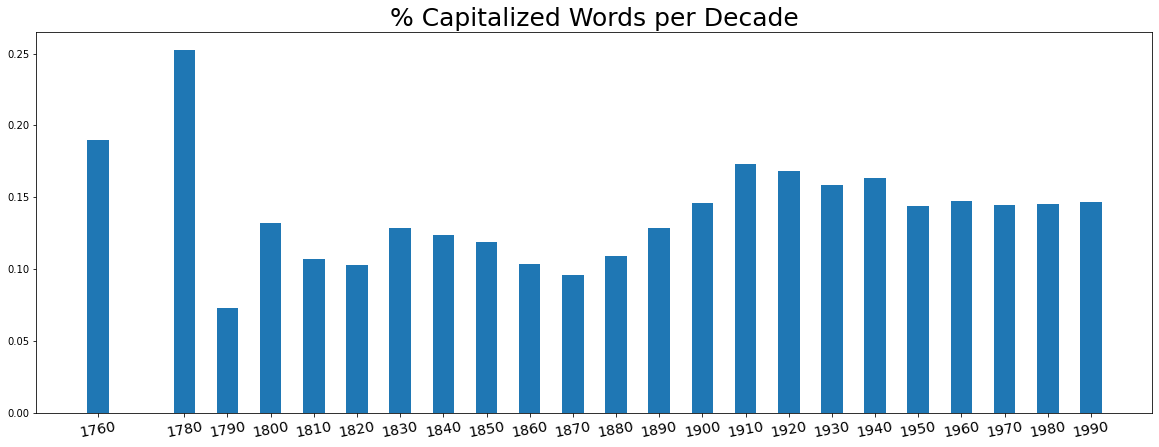

In [11]:
perc_capitalized_words = by_decade.median().perc_capitalized_words

fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(decades, perc_capitalized_words, width=5)
ax.set_xticks(decades)
ax.set_xticklabels(decades, rotation=10, size='x-large')
ax.set_title('% Capitalized Words per Decade', size=25)
# ax.set_ylabel('% Capitalized Words per Documents', size='x-large')
# ax.set_xlabel('Decade', size='xx-large')
fig.show()

**Figure:** This figure shows the median percentage of capitalized words in documents for each decade.

### Word Types

In [12]:
taft = all_presidents[all_presidents.president == 'Taft']
print('This file contains {:,} documents.'.format(len(taft)))

This file contains 6,209 documents.


0% complete (0/3000)
10% complete (300/3000)
20% complete (600/3000)
30% complete (900/3000)
40% complete (1200/3000)
50% complete (1500/3000)
60% complete (1800/3000)
70% complete (2100/3000)
80% complete (2400/3000)
90% complete (2700/3000)
Tagged 3000 documents in in 48.87 seconds.


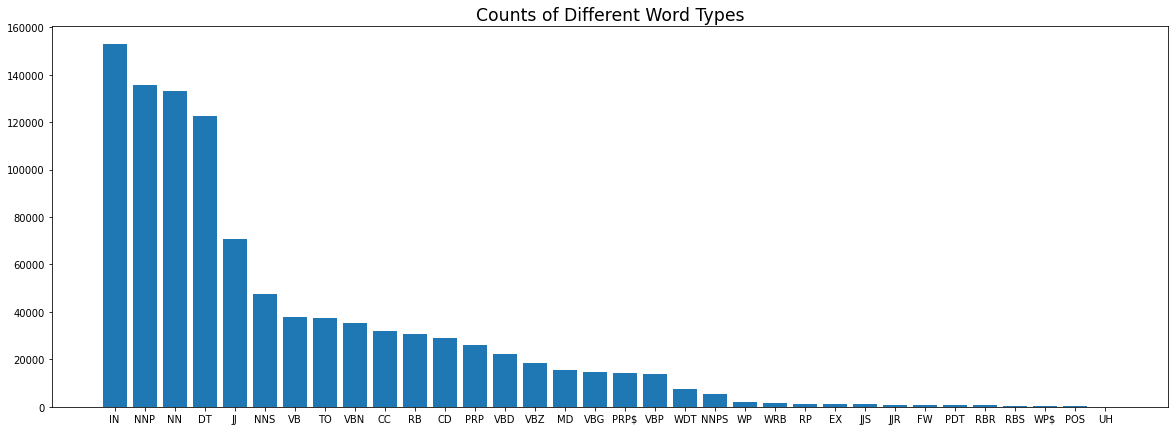

In [13]:
start = time()

tagged_words = []
num = 3000

for i in range(num):
    if not i % (num // 10): print("{0:.0%} complete ({1}/{2})".format(i / (num), i, num))
    sent = taft.iloc[i].text
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    tagged_words.extend(sent)

tag_types = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']
tag_dist = np.array(nltk.FreqDist(tag for (word, tag) in tagged_words if tag in tag_types).most_common())
counts = tag_dist[:, 1].astype(int)
# word_types = [tag_dict[w] for w in tag_dist[:, 0]]
word_types = tag_dist[:, 0]

fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(word_types, counts)
ax.set_title('Counts of Different Word Types', size='xx-large')
ax.set_xticklabels(word_types, rotation=0)
fig.show();

print('Tagged {0} documents in in {1:.2f} seconds.'.format(num, time() - start))

**Figure:** The most common word types from the Taft administration were IN (preposition), NNP (Proper Noun, singular), NN (noun, singular), DT (determiner), JJ (adjective), NNS (noun, plural)

## Word Tag meanings

* CC coordinating conjunction
* CD cardinal digit
* DT determiner
* EX existential there (like: "there is" ... think of it like "there exists")
* FW foreign word
* IN preposition/subordinating conjunction
* JJ adjective 'big'
* JJR adjective, comparative 'bigger'
* JJS adjective, superlative 'biggest'
* LS list marker 1)
* MD modal could, will
* NN noun, singular 'desk'
* NNS noun plural 'desks'
* NNP proper noun, singular 'Harrison'
* NNPS proper noun, plural 'Americans'
* PDT predeterminer 'all the kids'
* POS possessive ending parent's
* PRP personal pronoun I, he, she
* PRP\$ possessive pronoun my, his, hers
* RB adverb very, silently,
* RBR adverb, comparative better
* RBS adverb, superlative best
* RP particle give up
* TO to go 'to' the store.
* UH interjection errrrrrrrm
* VB verb, base form take
* VBD verb, past tense took
* VBG verb, gerund/present participle taking
* VBN verb, past participle taken
* VBP verb, sing. present, non-3d take
* VBZ verb, 3rd person sing. present takes
* WDT wh-determiner which
* WP wh-pronoun who, what
* WP\$ possessive wh-pronoun whose
* WRB wh-abverb where, when

In [109]:
a = """CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there
FW foreign word
IN preposition/subordinating conjunction
JJ adjective
JJR adjective, comparative
JJS adjective, superlative
LS list marker
MD modal could
NN noun, singular
NNS noun plural
NNP proper noun, singular
NNPS proper noun, plural 
PDT predeterminer
POS possessive ending
PRP personal pronoun 
PRP$ possessive pronoun
RB adverb
RBR adverb
RBS adverb
RP particle
TO to go 
UH interjection
VB verb, base form
VBD verb, past tense
VBG verb, gerund/present participle
VBN verb, past participle
VBP verb, present, non-3d
VBZ verb, 3rd person present
WDT wh-determiner
WP wh-pronoun
WP$ possessive wh-pronoun
WRB wh-abverb"""
tag_types = [b.split(' ')[0] for b in a.split('\n')]
meanings = [' '.join(b.split(' ')[1:]) for b in a.split('\n')]
tag_dict = dict(zip(tag_types, meanings))

## Word Distribution Plots

In [32]:
def print_century_word_dist(century):
    start = time()
    words = []

    century_subset = all_presidents[all_presidents.decade // 100 * 100 == century]
    century_subset = century_subset.sample(min(3000, len(century_subset))).reset_index()
    for i in range(len(century_subset)):
        sent = century_subset.iloc[i].text
        words.extend(sent.split(' '))    

    stop_words = nltk.corpus.stopwords.words(['english', 'spanish']) + list(string.punctuation)

    tag_dist = np.array(nltk.FreqDist([word.lower() for word in words if word.lower() not in stop_words]).most_common())[:30]
    counts = tag_dist[:, 1].astype(int)
    word_dist = tag_dist[:, 0]

    fig, ax = plt.subplots(figsize=(20, 7))
    ax.bar(word_dist, counts)
    ax.set_title(f'Word Distribution in the {century}s', size='xx-large')
    ax.set_xticklabels(word_dist, rotation=30, size=12)
    fig.show();

CPU times: user 105 ms, sys: 943 µs, total: 105 ms
Wall time: 108 ms
CPU times: user 10.9 s, sys: 174 ms, total: 11 s
Wall time: 11 s
CPU times: user 9.23 s, sys: 100 ms, total: 9.33 s
Wall time: 9.33 s


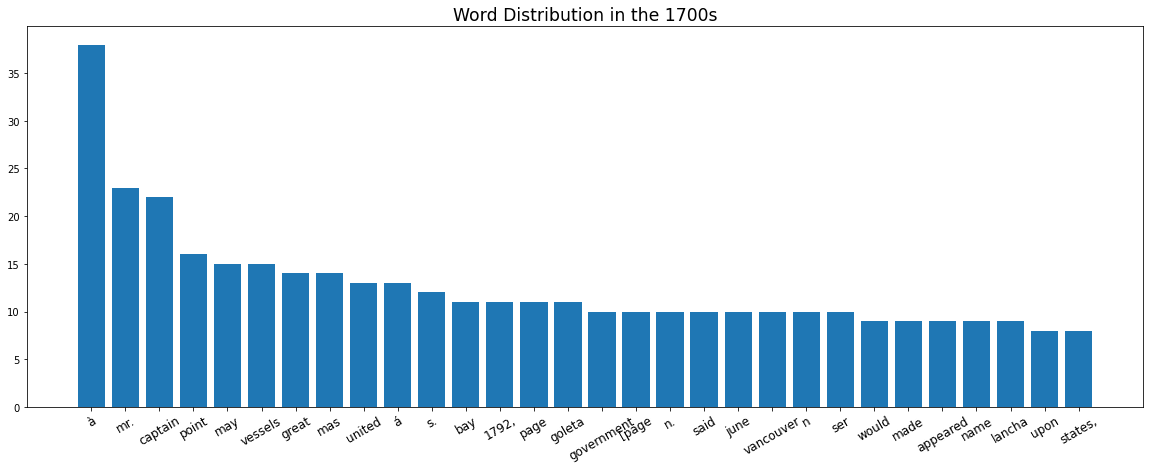

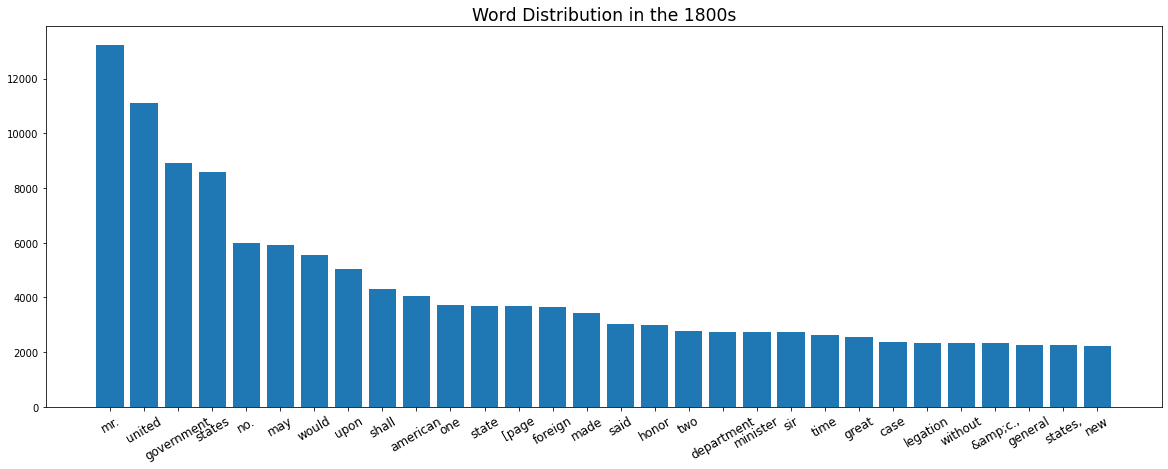

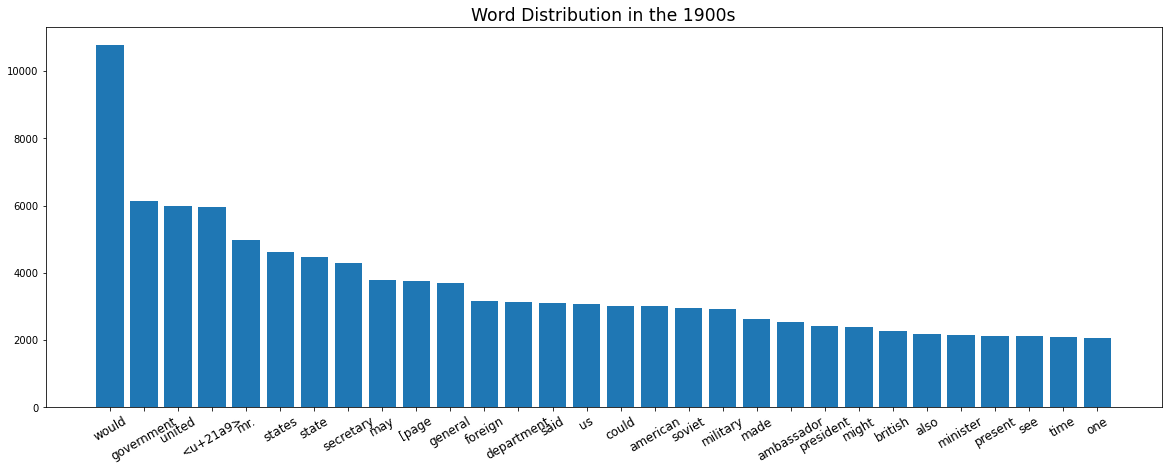

In [34]:
%time print_century_word_dist(1700)
%time print_century_word_dist(1800)
%time print_century_word_dist(1900)

**Figure:** The most popular words from each decade (taken from a sample of 3,000 documents):

*   **1700s -** à, mr., captain, point, may, vessels, great, mas, united
*   **1800s -** mr., united, government, states, no., may, would
*   **1900s -** would, government, ↩, united, mr., secretary, state



## Language Distribution Plots

In [107]:
def century_lang_dist(century):
    start = time()
    langs = []

    century_subset = all_presidents[all_presidents.decade // 100 * 100 == century]
    century_subset = century_subset.sample(min(5000, len(century_subset))).reset_index()
    for i in range(len(century_subset)):
        sent = century_subset.iloc[i].text
        langs.append(detect(sent[:100]))    

    tag_dist = np.array(nltk.FreqDist(langs).most_common())
    counts = tag_dist[:, 1].astype(int)
    lang_dist = tag_dist[:, 0]

    return lang_dist, counts

In [108]:
for c in [1700, 1800, 1900]:
    print(f"{c}s:")
    langs, counts = century_lang_dist(c)
    for l, n in zip(langs, counts):
        print(f"\t- {language_name(l)}:   {n}") 

1700s:
	- English:   6
1800s:
	- English:   4989
	- French:   4
	- German:   3
	- Spanish:   1
	- Portuguese:   1
	- Norwegian:   1
	- Italian:   1
1900s:
	- English:   4998
	- Spanish:   1
	- German:   1
